In [64]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline
print(pd.__version__) # version 0.23.4
print(sk.__version__) # version 0.20.1

import warnings
warnings.filterwarnings('ignore')

0.23.4
0.20.1


#### Método para ler ados dos Voos de 2000 até 2018

In [2]:
def readData(fileName): 
    return pd.read_csv(fileName, sep=';', encoding='utf-8')
    

#### Método os dados de voos com origem diferente de Brasil

In [3]:
def clearNotBrazilianFlights(df):
    return df[df['AEROPORTO DE ORIGEM (PAÍS)'] == 'BRASIL']

#### Método para gerar uma coluna Internacional

In [4]:
def createColumns(df):
    df['INTERNACIONAL'] = df['AEROPORTO DE DESTINO (PAÍS)'] != 'BRASIL'
    df['ASSENTOS'] = df['ASSENTOS'] / df['DECOLAGENS']
    df['DISTÂNCIA VOADA (KM)'] = df['DISTÂNCIA VOADA (KM)'] / df['DECOLAGENS']
    df['PASSAGEIROS PAGOS'] = df['PASSAGEIROS PAGOS'] / df['DECOLAGENS']
    df['PASSAGEIROS GRÁTIS'] = df['PASSAGEIROS GRÁTIS'] / df['DECOLAGENS']
    df['CARGA PAGA (KG)'] = df['CARGA PAGA (KG)'] / df['DECOLAGENS']
    df['CARGA GRÁTIS (KG)'] = df['CARGA GRÁTIS (KG)'] / df['DECOLAGENS']
    return df

#### Método para remover as colunas que não iremos utilizar

In [5]:
def removeNotUsedColumns(df):
    return df.drop([
         'EMPRESA (SIGLA)', 
         'EMPRESA (NOME)', 
         'EMPRESA (NACIONALIDADE)', 
         'AEROPORTO DE ORIGEM (SIGLA)', 
         'AEROPORTO DE ORIGEM (NOME)',
         'AEROPORTO DE ORIGEM (UF)',
         'AEROPORTO DE ORIGEM (PAÍS)',
         'AEROPORTO DE ORIGEM (CONTINENTE)',
         'AEROPORTO DE DESTINO (SIGLA)',
         'AEROPORTO DE DESTINO (NOME)',
         'AEROPORTO DE DESTINO (UF)',
         'AEROPORTO DE DESTINO (REGIÃO)',
         'AEROPORTO DE DESTINO (PAÍS)',
         'AEROPORTO DE DESTINO (CONTINENTE)',
         'NATUREZA',
         'GRUPO DE VOO',
         'ASK',
         'RPK',
         'ATK',
         'RTK',
         'COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS',
         'CARGA GRATIS KM',
         'CORREIO KM',
         'PAYLOAD',
         'HORAS VOADAS',
         'BAGAGEM (KG)',
         'CORREIO (KG)',
         'CARGA PAGA KM'
        ], axis=1)

#### Renomendo as colunas

In [6]:
def renameColumsn(df):
    df.columns = ['ANO', 'MES', 'ORIGEM', 'NUM_PAX_PG', 'NUM_PAX_GR', 'CARGA_PG', 'CARGA_GR', 'DISTANCIA', 'QTDE', 'ASSENTOS', 'INTER']
    return df

In [7]:
def clearData(df):
    df = df[~np.isnan(df['NUM_PAX_PG'])]
    df = df[~np.isnan(df['NUM_PAX_GR'])]
    df = df[~np.isnan(df['CARGA_PG'])]
    df = df[~np.isnan(df['CARGA_GR'])]
    df = df[~np.isnan(df['DISTANCIA'])]
    df = df[~np.isnan(df['QTDE'])]
    df = df[~np.isnan(df['ASSENTOS'])]
    df = df[df['ASSENTOS'] > 120] # mínimo de 120 lugares (aviões comerciais)
    df = df[df['NUM_PAX_PG'] > 10] # mínimo de 10 pagantes (aviões comerciais)
    df = df[df['NUM_PAX_PG'] > 0]
    df = df[df['QTDE'] > 0]
    df = df[df['DISTANCIA'] > 300] # mínimo de 300 km
    return df

In [8]:
def convertTypes(df):
    df['NUM_PAX_PG'].astype('int64')
    df['NUM_PAX_GR'].astype('int64')
    df['CARGA_PG'].astype('int64')
    df['CARGA_GR'].astype('int64')
    df['DISTANCIA'].astype('int64')
    df['QTDE'].astype('int64')
    df['ASSENTOS'].astype('int64')
    return df

In [77]:
#df = readData('data/data_2017.csv')
df = readData('data/data.csv')
df = clearNotBrazilianFlights(df)
df = createColumns(df)
df = removeNotUsedColumns(df)
df = renameColumsn(df)
df = clearData(df)
df = convertTypes(df)
print("Exemplo dos dados:")
display(df.head())
print("-----------------")

print("Dados estatísticos:")
display(df.describe())
print("-----------------")

Exemplo dos dados:


,ANO,MES,ORIGEM,NUM_PAX_PG,NUM_PAX_GR,CARGA_PG,CARGA_GR,DISTANCIA,QTDE,ASSENTOS,INTER
0,2000,2,SUDESTE,236.484848,18.060606,20735.909091,0.0,6603.666667,33.0,211.0,True
1,2000,2,SUDESTE,58.607143,3.857143,1260.321429,0.0,1137.000000,28.0,211.0,True
2,2000,2,SUDESTE,45.000000,5.035714,2933.464286,0.0,1567.000000,28.0,211.0,True
5,2000,2,SUL,95.000000,2.000000,2818.333333,0.0,1567.000000,3.0,211.0,False
17,2000,3,SUDESTE,30.000000,2.000000,2265.500000,3.0,600.000000,2.0,211.0,False


-----------------
Dados estatísticos:


,ANO,MES,NUM_PAX_PG,NUM_PAX_GR,CARGA_PG,CARGA_GR,DISTANCIA,QTDE,ASSENTOS
count,189643.000000,189643.000000,189643.000000,189643.000000,189643.000000,189643.000000,189643.000000,189643.000000,189643.000000
mean,2010.323323,6.424698,124.724021,2.302329,1034.174547,12.727116,1857.403774,48.581245,172.068538
std,4.944402,3.480992,177.506268,10.717604,4217.783523,168.212457,2468.767186,68.091681,39.084920
min,2000.000000,1.000000,10.016129,0.000000,0.000000,0.000000,301.000000,1.000000,120.014706
25%,2006.000000,3.000000,73.000000,0.200000,1.053952,0.000000,590.000000,7.000000,145.333333
50%,2011.000000,6.000000,107.750000,1.084337,172.969697,0.000000,1085.000000,30.000000,168.000000
75%,2015.000000,9.000000,141.666667,2.508772,649.095287,1.633333,1948.000000,61.000000,177.000000
max,2018.000000,12.000000,12180.000000,1484.000000,524441.000000,34782.608696,362796.000000,918.000000,925.000000


-----------------


#### Transformando Texto

In [78]:
def getDummies(df):
    return pd.get_dummies(df)

#### Normalização dos dados

In [79]:
def normalizeData(df, processor = None):
    if processor == None:
        processor = StandardScaler()
        scaled = processor.fit_transform(df)
        return (scaled, processor)
    else:
        scaled = processor.transform(df)
        return scaled

def denormalizeData(df, processor):    
    unscaled = processor.inverse_transform(df)
    return df

#### Aplicando PCA nos dados numéricos

In [80]:
def aplyPCA(df):
    pca = PCA(n_components=2)
    pca_transform = pca.fit_transform(df)
    return pd.DataFrame(pca_transform, columns=['x1', 'x2'])

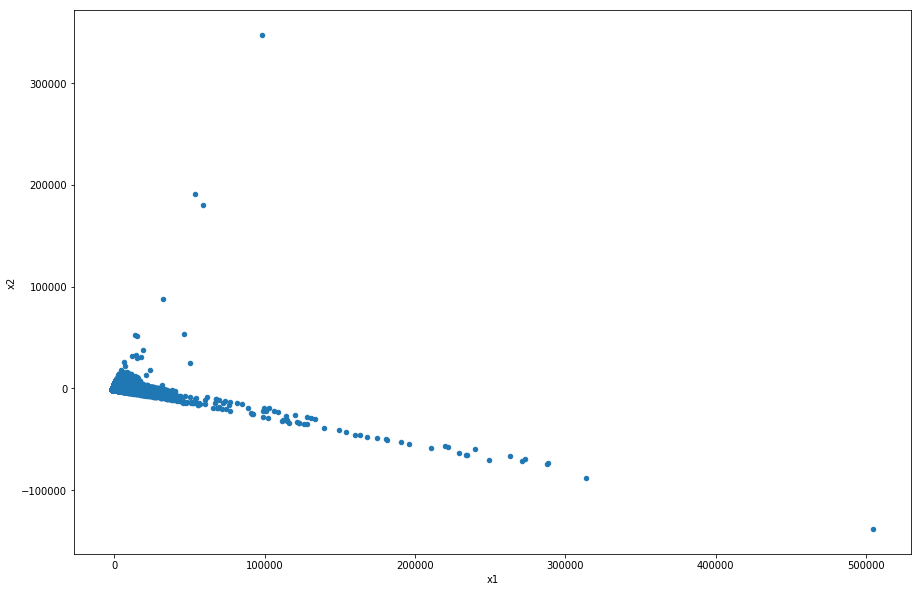

In [81]:
df_dummies = getDummies(df)
df_pca = aplyPCA(df_dummies)
df_pca.plot.scatter(x='x1', y='x2', figsize=(15,10))

#### Treinar Regressão

In [82]:
def trainRegression(x, y, max_iter=10000, tol=1e-3, penalty='l2', alpha=0.0001, learning_rate='invscaling'):
    clf = SGDRegressor(max_iter=max_iter, 
                       tol=tol,
                       penalty=penalty,
                       alpha=alpha,
                       learning_rate=learning_rate,
                       random_state=0)
    clf.fit(x, y)   
    return clf

#### Calibrando Modelo de Regressão

In [84]:
df_dummies = getDummies(df)
features = df_dummies.drop(columns=['QTDE'])
values = df_dummies['QTDE']
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    values, 
                                                    test_size = 0.2, 
                                                   random_state = 0)
(X_scaled, normalizer) = normalizeData(X_train)
clf = trainRegression(X_scaled, y_train)
X_test_scaled = normalizeData(X_test, normalizer)
print("score {}".format(clf.score(X_test_scaled, y_test)))

(X_scaled, normalizer) = normalizeData(X_train)
for max_iter in [10, 100, 1000, 10000]:
    for tol in [1e-3, 1e-4, 1e-5]:
        for penalty in ['none', 'l2', 'l1', 'elasticnet']:
            clf = trainRegression(X_scaled, y_train, max_iter, tol, penalty)
            X_test_scaled = normalizeData(X_test, normalizer)
            print("max_iter {}, tol {}, penalty {}, score {}".format(max_iter, tol, penalty, clf.score(X_test_scaled, y_test)))

score 0.07078336560145049
max_iter 10, tol 0.001, penalty none, score 0.07077533644375744
max_iter 10, tol 0.001, penalty l2, score 0.07078336560145049
max_iter 10, tol 0.001, penalty l1, score 0.07091417240894982
max_iter 10, tol 0.001, penalty elasticnet, score 0.07080449286038593
max_iter 10, tol 0.0001, penalty none, score 0.07077533644375744
max_iter 10, tol 0.0001, penalty l2, score 0.07078336560145049
max_iter 10, tol 0.0001, penalty l1, score 0.07091417240894982
max_iter 10, tol 0.0001, penalty elasticnet, score 0.07080449286038593
max_iter 10, tol 1e-05, penalty none, score 0.07077533644375744
max_iter 10, tol 1e-05, penalty l2, score 0.07078336560145049
max_iter 10, tol 1e-05, penalty l1, score 0.07091417240894982
max_iter 10, tol 1e-05, penalty elasticnet, score 0.07080449286038593
max_iter 100, tol 0.001, penalty none, score 0.07077533644375744
max_iter 100, tol 0.001, penalty l2, score 0.07078336560145049
max_iter 100, tol 0.001, penalty l1, score 0.07091417240894982
max_i

In [85]:
(X_scaled, normalizer) = normalizeData(X_train)
for alpha in [1e-5, 1e-6, 1e-7, 1e-20]:
    for learning_rate in ['constant', 'optimal', 'invscaling', 'adaptive']:
        clf = trainRegression(X_scaled, y_train, 10000, 1e-5, 'l2', alpha, learning_rate)
        X_test_scaled = normalizeData(X_test, normalizer)
        print("alpha {}, learning_rate {}, score {}".format(alpha, learning_rate, clf.score(X_test_scaled, y_test)))

alpha 1e-05, learning_rate constant, score -2.6459087108231076e+18
alpha 1e-05, learning_rate optimal, score -1.3218155320083516e+16
alpha 1e-05, learning_rate invscaling, score 0.07077614088031281
alpha 1e-05, learning_rate adaptive, score 0.07333573796256765
alpha 1e-06, learning_rate constant, score -2.6557771759581317e+18
alpha 1e-06, learning_rate optimal, score -9.210423762936984e+19
alpha 1e-06, learning_rate invscaling, score 0.07077541690263955
alpha 1e-06, learning_rate adaptive, score 0.0733357735619744
alpha 1e-07, learning_rate constant, score -2.6608442376219223e+18
alpha 1e-07, learning_rate optimal, score -2.9895350367061426e+22
alpha 1e-07, learning_rate invscaling, score 0.07077534448979295
alpha 1e-07, learning_rate adaptive, score 0.07333577712209882
alpha 1e-20, learning_rate constant, score -2.661296158205257e+18
alpha 1e-20, learning_rate optimal, score -7.963506893964473e+33
alpha 1e-20, learning_rate invscaling, score 0.07077533644375744
alpha 1e-20, learning_r

In [88]:
df_dummies = getDummies(df)
features = df_dummies.drop(columns=['QTDE'])
values = df_dummies['QTDE']
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    values, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
(X_scaled, normalizer) = normalizeData(X_train)
clf = trainRegression(X_scaled, y_train, 10000, 1e-5, 'l2', 1e-06, 'invscaling')
X_test_scaled = normalizeData(X_test, normalizer)
clf.score(X_test_scaled, y_test)

0.07077541690263955